# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

* Carregamento dos pacotes

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from seaborn import load_dataset

* Carregamento da base de dados e criação das variáveis

In [2]:
df = sns.load_dataset("tips")

df['net_bill'] = df['total_bill'] - df['tip']
df['tip_pct'] = df['tip'] / df['net_bill']

df.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


* Criação do modelo de regressão

In [3]:
reg = smf.ols(data = df, 
              formula = 'tip ~ net_bill')

modelo_prev_tip = reg.fit()

modelo_prev_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           5.02e-23
Time:                        16:01:55   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

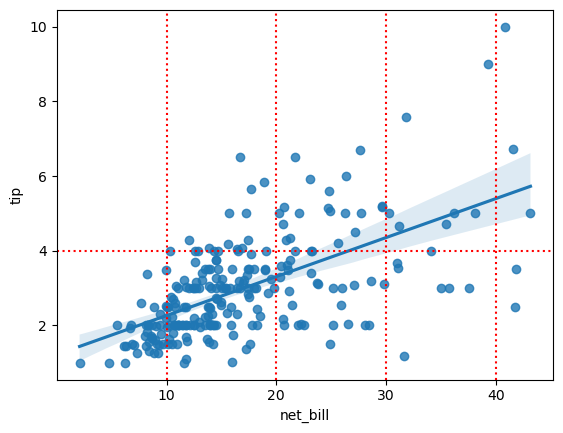

In [4]:
plt.figure()

# Scatter plot com a linha de previsao (pego só o que a gorjeta é menor que o valor total)
ax = sns.regplot(data = df[ df['tip_pct'] < 0.5 ], 
#ax = sns.regplot(data = df, 
                 x = 'net_bill', 
                 y = 'tip')

ax.axhline(y = 4, color = 'red', linestyle = ':')

ax.axvline(x = 10, color = 'red', linestyle = ':')
ax.axvline(x = 20, color = 'red', linestyle = ':')
ax.axvline(x = 30, color = 'red', linestyle = ':')
ax.axvline(x = 40, color = 'red', linestyle = ':')


plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [5]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244


In [6]:
reg = smf.ols(data = df, 
              formula = 'tip_pct ~ net_bill')

modelo_prev_pct = reg.fit()

modelo_prev_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.52e-06
Time:                        16:01:55   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

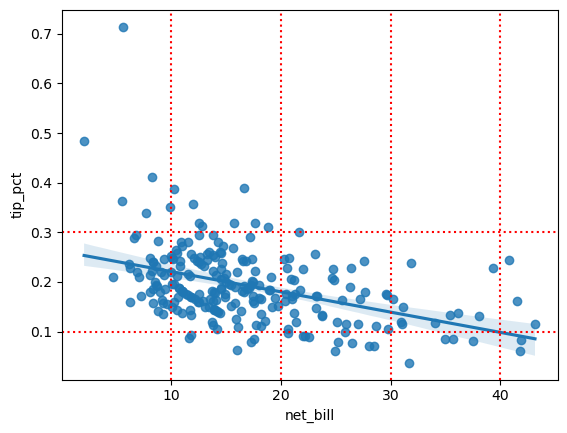

In [7]:
plt.figure()


# Gráfico de disperção (pego só o que tem gorjeta menor que 100% do valor pago)
ax = sns.regplot(data = df[ df['tip_pct'] < 1 ], x = 'net_bill', y = 'tip_pct')

ax.axhline(y=0.10, color = 'red', linestyle=':')
ax.axhline(y=0.30, color = 'red', linestyle=':')


ax.axvline(x=10, color = 'red', linestyle=':')
ax.axvline(x=20, color = 'red', linestyle=':')
ax.axvline(x=30, color = 'red', linestyle=':')
ax.axvline(x=40, color = 'red', linestyle=':')

plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

* O primeiro gráfico tem um coeficiente de inclinação positivo, portanto a linha de previsão sugere que conforme o valor pago aumenta (eixo X), o valor da gorjeta também aumenta (eixo Y).

- Já o segundo gráfico tem um coeficiente de inclinação negativo, logo a linha de previsao vai sugerir que conforme o valor pago aumentar (eixo X) a % que a gorjeta representa vai diminuir (eixo Y).

* Essa relação inversa de um gráfico pro outro faz total sentido, pois se a gorjeta sempre representar uma % fixa do valor da conta, para valores menores essa % fixa vai representar uma proporção maior em relação ao valor.

- O $R^2$s do modelo treinado para prever o valor da gorjeta a partir do valor da conta, apresentou um melhor resultado. 

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [8]:
#1)

modelo_prev_pct.fittedvalues

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [9]:
#2)

modelo_prev_pct.fittedvalues * df['net_bill']

0      3.309254
1      2.186938
2      3.461450
3      3.668785
4      3.699998
         ...   
239    3.773120
240    3.790751
241    3.684707
242    3.319003
243    3.287232
Length: 244, dtype: float64

In [10]:
#3)

modelo_prev_tip.rsquared

0.3325407312323705

In [11]:
#4)

print(f"R-squared do modelo de previsao valor da gorjeta: {modelo_prev_tip.rsquared}")
print(f"R-squared do modelo de previsao % da gorjeta: {modelo_prev_pct.rsquared}")



R-squared do modelo de previsao valor da gorjeta: 0.3325407312323705
R-squared do modelo de previsao % da gorjeta: 0.09129084920662933
